In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from wordcloud import WordCloud

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import contractions

# 1. Exploration du jeu de données

In [2]:
DATASET_FILE = "./dataset.csv"

In [3]:
dataset_df = pd.read_csv(DATASET_FILE)
dataset_df

text  stars
0      I've only had food from here once and it wasn'...      1
1      I will never return here again.  Ever.  I was ...      1
2      I wish my experience was great as others. I di...      1
3      Are the rosemary grapefruit scones supposed to...      1
4      Our takeout order was half wrong. Food was mis...      1
...                                                  ...    ...
24995  I was a loyal fan of Aroy before the ownership...      5
24996  Stopped here for a bite while wandering around...      5
24997  A quiet place with excellent food, great music...      5
24998  Super delicious food. Awesome vibe. I suffered...      5
24999  I have a lot of dietary restrictions and this ...      5

[25000 rows x 2 columns]

## 1.1 Répartition des avis clients en fonction du nombre d'étoiles

In [4]:
stars_columns = dataset_df.stars
stars_columns

0        1
1        1
2        1
3        1
4        1
        ..
24995    5
24996    5
24997    5
24998    5
24999    5
Name: stars, Length: 25000, dtype: int64

In [5]:
stars_columns.value_counts()

1    5000
2    5000
3    5000
4    5000
5    5000
Name: stars, dtype: int64

In [6]:
stars_columns.value_counts().plot(kind="pie", figsize=(10, 8), autopct="%1.1f%%", shadow=True)

<AxesSubplot:ylabel='stars'>

## 1.2 Distribution de la longueur (nombre de mots) des avis clients

In [7]:
dataset_df["length"] = dataset_df["text"].apply(lambda x: len(x.split()))
dataset_df

text  stars  length
0      I've only had food from here once and it wasn'...      1      68
1      I will never return here again.  Ever.  I was ...      1      87
2      I wish my experience was great as others. I di...      1     166
3      Are the rosemary grapefruit scones supposed to...      1      81
4      Our takeout order was half wrong. Food was mis...      1      32
...                                                  ...    ...     ...
24995  I was a loyal fan of Aroy before the ownership...      5      75
24996  Stopped here for a bite while wandering around...      5      55
24997  A quiet place with excellent food, great music...      5      32
24998  Super delicious food. Awesome vibe. I suffered...      5      41
24999  I have a lot of dietary restrictions and this ...      5      87

[25000 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

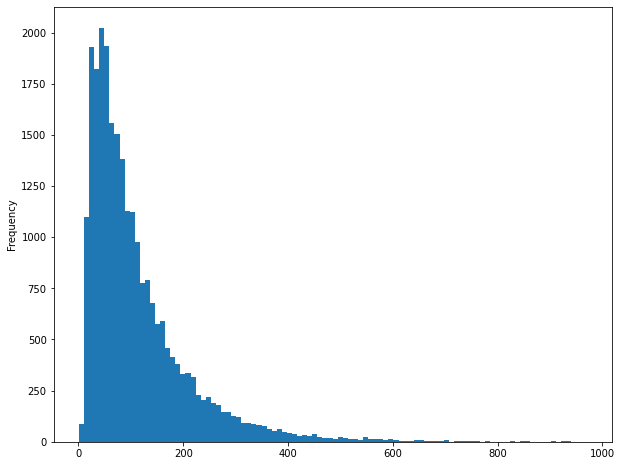

In [8]:
dataset_df.length.plot(kind="hist", bins=100, figsize=(10, 8))

## 1.3 Distribution de la longueur des avis clients en fonction du nombre d'étoiles des avis

In [9]:
plt.figure(figsize=(10, 8))

ax = sns.boxplot(x=dataset_df.stars ,
            y=dataset_df.length,
            showmeans=True,
            )
ax.set_ylim(0, 400)

ax.set_title("Répartition des longueurs des avis en fonction du nombre d'étoiles")

Text(0.5, 1.0, "Répartition des longueurs des avis en fonction du nombre d'étoiles")

# 2. Pré-traitement du jeu de données